In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# Базовая работа с изображением

In [78]:
image = cv2.imread('sar_2_color.jpg')
image_rgb = image[:, :, ::-1]


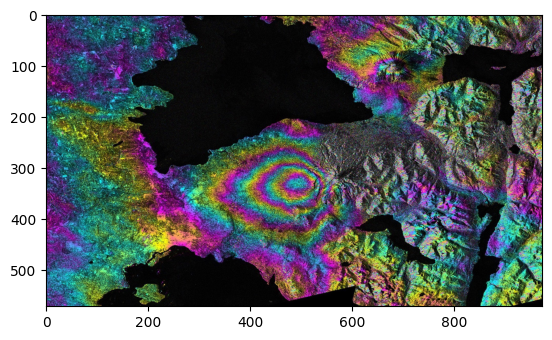

In [79]:
plt.imshow(image_rgb)

In [80]:
image.shape # h,w,c

(572, 974, 3)

In [81]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [82]:
# ROI
img_roi = image[100:200, 500:700]

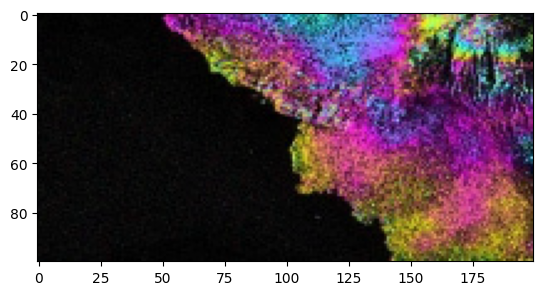

In [83]:
plt.imshow(img_roi)

In [84]:
b,g,r = cv2.split(image)

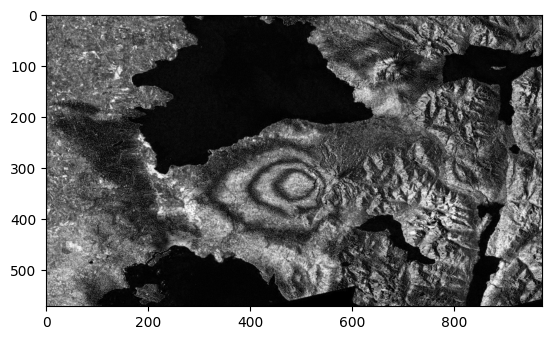

In [85]:
plt.imshow(b, cmap = 'gray')

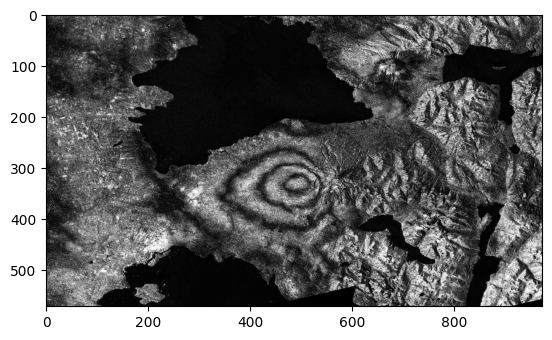

In [86]:
plt.imshow(g, cmap = 'gray')

In [87]:
# alternative approach
b = image[:,:,0]

In [88]:
import copy

image2 = copy.deepcopy(image)

In [89]:
image2[50:100,50:100] = [0,0,0]

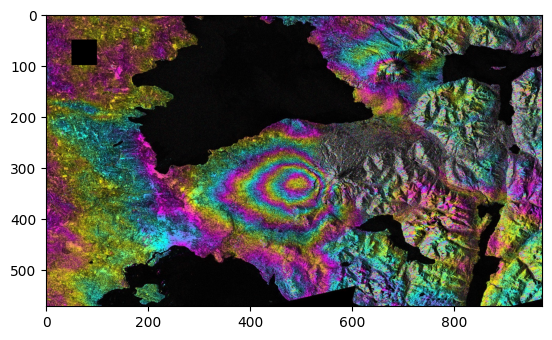

In [90]:
plt.imshow(image2)

In [91]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

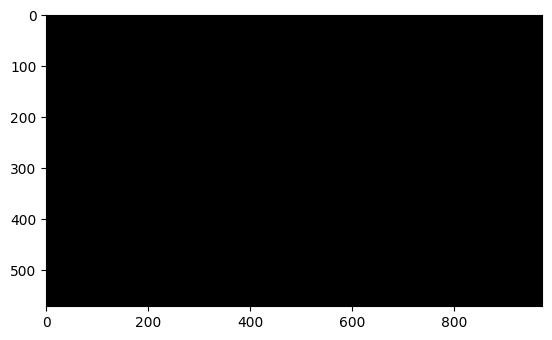

In [92]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [93]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [94]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [95]:
image_gray[0,0]

np.uint8(40)

In [96]:
image_gray.shape

(572, 974)

In [97]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [98]:
image_hsv.shape

(572, 974, 3)

In [99]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [100]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [101]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [102]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [103]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

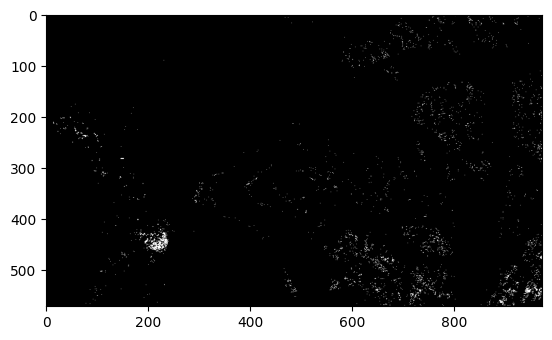

In [104]:
plt.imshow(thresh1, cmap='gray')

In [105]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [106]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

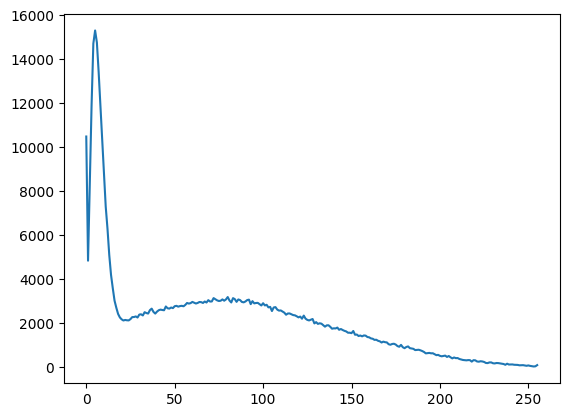

In [107]:
plt.plot(b_hist)

In [108]:
b_hist_cum = b_hist.cumsum()

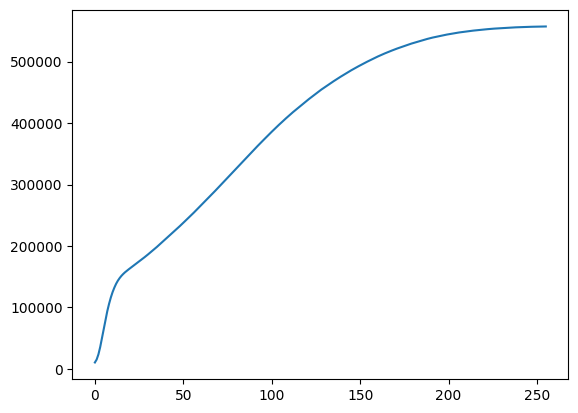

In [109]:
plt.plot(b_hist_cum)

In [110]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

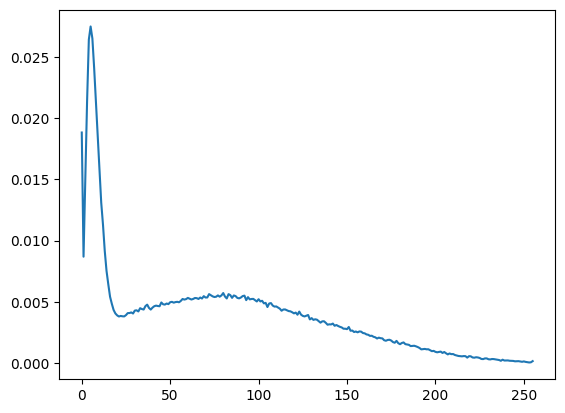

In [111]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [112]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


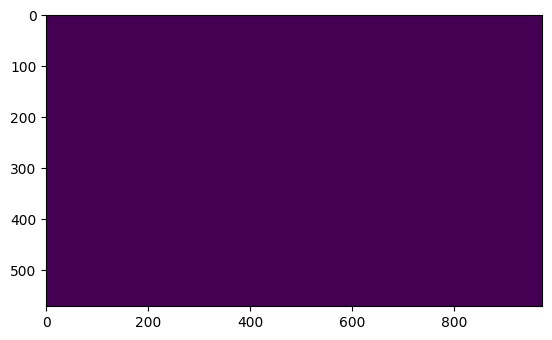

In [113]:
plt.imshow(diff)

In [114]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [115]:
mean = image_gray.mean()

In [116]:
std = image_gray.std()

In [117]:
print(mean,std)

67.41225535245043 52.016191875959635


In [118]:
eq_gray = cv2.equalizeHist(image_gray)

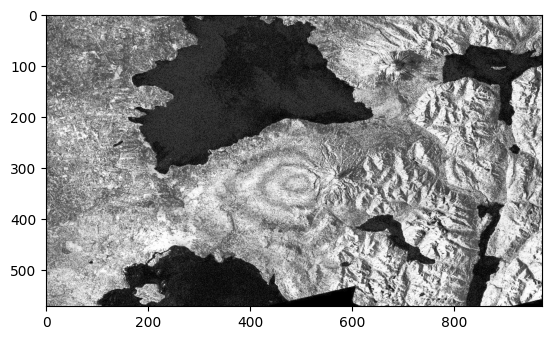

In [119]:
plt.imshow(eq_gray, cmap="gray")


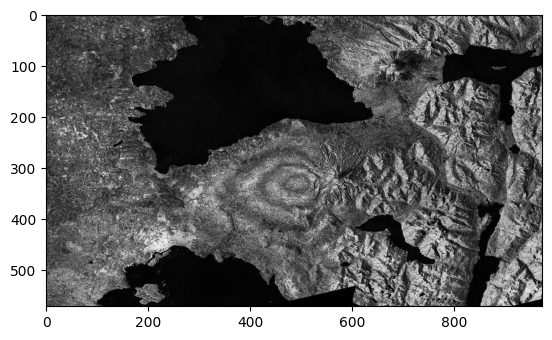

In [120]:
plt.imshow(image_gray, cmap="gray")

In [121]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


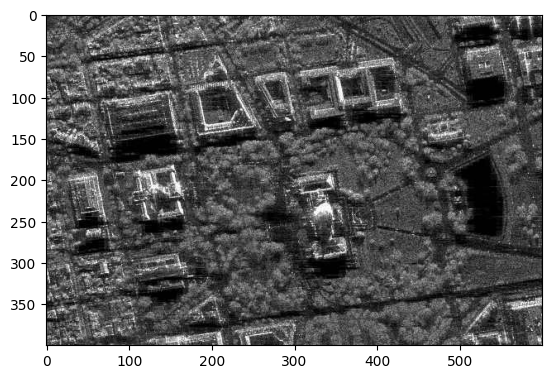

In [122]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.

image_gray = cv2.imread('sar_1_gray.jpg')
plt.imshow(image3)

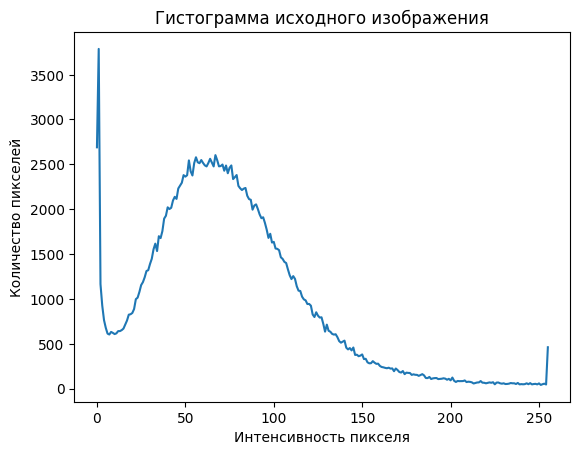

In [123]:
# 2. постройте гистограмму
hist_size = 256
hist_range = (0, 256)
    
b_hist = cv2.calcHist([image_gray], [0], None, [hist_size], hist_range, accumulate=False)
plt.plot(b_hist)
plt.title('Гистограмма исходного изображения')
plt.xlabel('Интенсивность пикселя')
plt.ylabel('Количество пикселей')

plt.show()

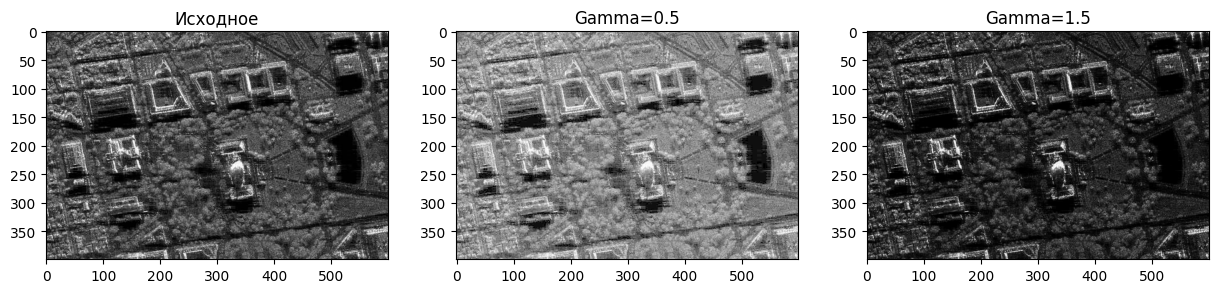

In [124]:
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
image1 = copy.deepcopy(image_gray)
gamma_low = 0.5
image_gamma_low = np.array(255 * (image1 / 255.0) ** gamma_low, dtype='uint8')
   
gamma_high = 1.5
image_gamma_high = np.array(255 * (image1 / 255.0) ** gamma_high, dtype='uint8')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image1)
plt.title("Исходное")

plt.subplot(1,3,2)
plt.imshow(image_gamma_low)
plt.title(f"Gamma={gamma_low}")

plt.subplot(1,3,3)
plt.imshow(image_gamma_high)
plt.title(f"Gamma={gamma_high}")

plt.show()

In [125]:
print("image1:", image1.shape)
print("image_gamma_low:", image_gamma_low.shape)

image1: (400, 600, 3)
image_gamma_low: (400, 600, 3)


SSIM: 0.7875008686792753


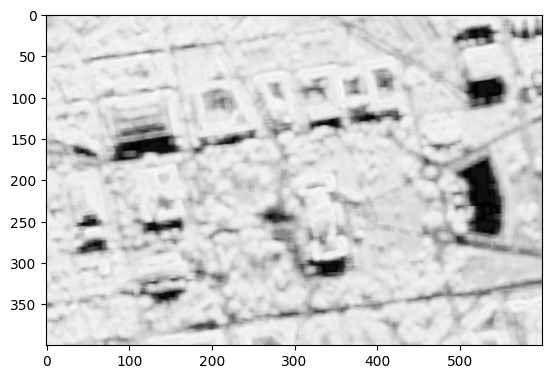

In [126]:
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
image_gamma_low_gray = cv2.cvtColor(image_gamma_low, cv2.COLOR_BGR2GRAY) 
(ssim_low, diff_low) = structural_similarity(image1_gray, image_gamma_low_gray, full=True)
diff_low = (diff_low * 255).astype("uint8")

print("SSIM: {}".format(ssim_low))
plt.imshow(diff_low, cmap='gray')

SSIM: 0.8065788107754002


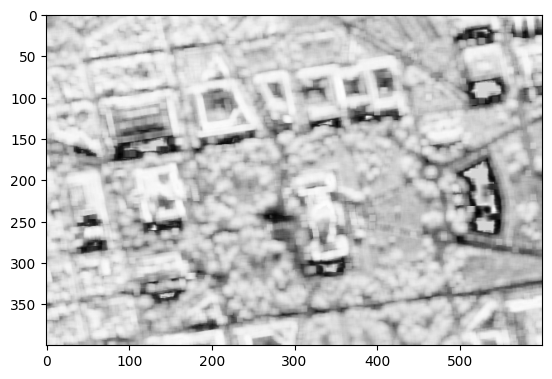

In [127]:
image_gamma_high_gray = cv2.cvtColor(image_gamma_high, cv2.COLOR_BGR2GRAY) 
(ssim_high, diff_high) = structural_similarity(image1_gray, image_gamma_high_gray, full=True)
diff_high = (diff_high * 255).astype("uint8")

print("SSIM: {}".format(ssim_high))
plt.imshow(diff_high, cmap='gray')

In [128]:
mse_low = mean_squared_error(image1_gray, image_gamma_low_gray)
mse_low

np.float64(3250.429145833333)

In [129]:
mse_high = mean_squared_error(image1_gray, image_gamma_high_gray)
mse_high

np.float64(971.8206541666667)

74.94157083333333 43.658465466227916


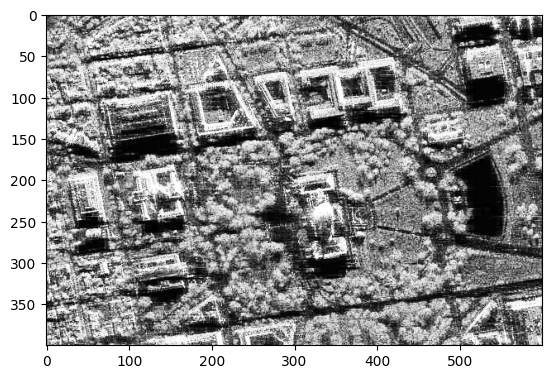

In [130]:
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
eq_gray = cv2.equalizeHist(image1_gray)
mean = image_gray.mean()
std = image_gray.std()
print(mean,std)
plt.imshow(eq_gray, cmap="gray")

mean_ref = eq_gray.mean()
std_ref = eq_gray.std()

In [131]:
mean_ref = eq_gray.mean()
std_ref = eq_gray.std()

mean_src = image1_gray.mean()
std_src = image1_gray.std()

print(mean_src, std_src)
print(mean_ref, std_ref)

74.94157083333333 43.658465466227916
127.02563333333333 74.26964841889017


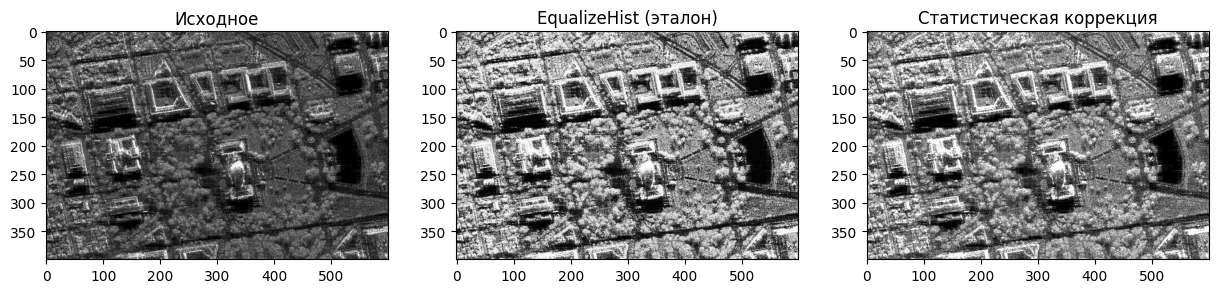

In [132]:
image1_stat_corr = (image1_gray - mean_src) * (std_ref / std_src) + mean_ref
image1_stat_corr = np.clip(image1_stat_corr, 0, 255).astype(np.uint8)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image1_gray, cmap="gray")
plt.title("Исходное")

plt.subplot(1,3,2)
plt.imshow(eq_gray, cmap="gray")
plt.title("EqualizeHist (эталон)")

plt.subplot(1,3,3)
plt.imshow(image1_stat_corr, cmap="gray")
plt.title("Статистическая коррекция")

plt.show()

np.uint64(0)

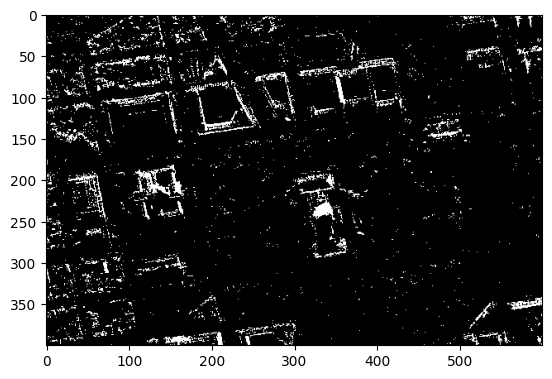

In [133]:
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
_, thresh_bin = cv2.threshold(image1_gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_bin, cmap='gray')
thresh_bin[thresh_bin==100].sum()

np.uint64(0)

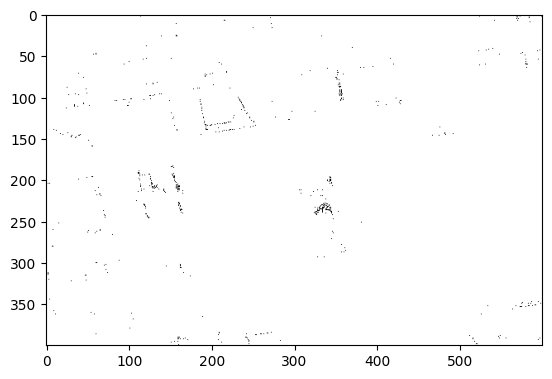

In [134]:
_, thresh_bin_inv = cv2.threshold(image1_gray, 250, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_bin_inv, cmap='gray')
thresh_bin_inv[thresh_bin_inv==100].sum()

np.uint64(5728800)

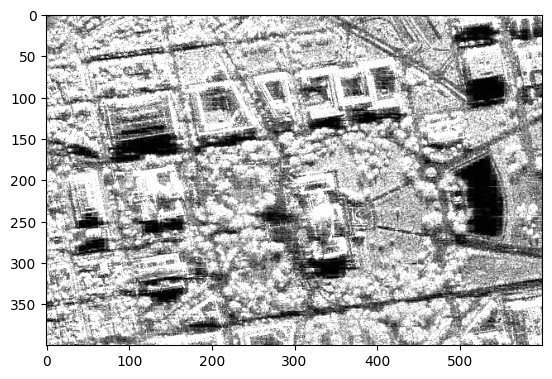

In [135]:
_, thresh_trunc = cv2.threshold(image1_gray, 100, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh_trunc, cmap='gray')
thresh_trunc[thresh_trunc==100].sum()

np.uint64(0)

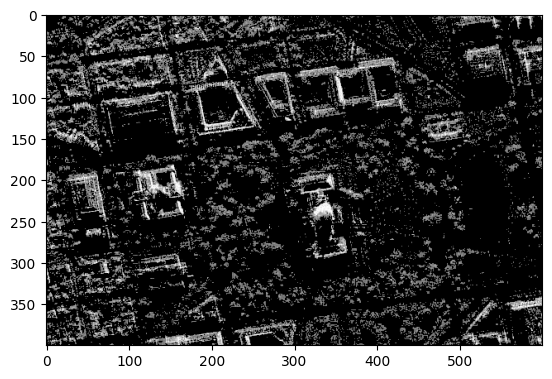

In [136]:
_, thresh_tozero = cv2.threshold(image1_gray, 100, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh_tozero, cmap='gray')
thresh_tozero[thresh_tozero==100].sum()

np.uint64(163500)

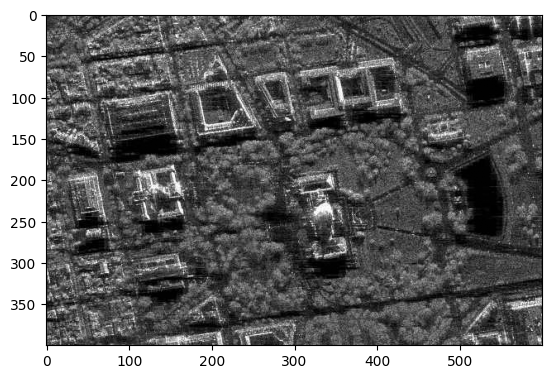

In [137]:
_, thresh_tozero_inv = cv2.threshold(image1_gray, 400, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh_tozero_inv, cmap='gray')
thresh_tozero_inv[thresh_tozero_inv==100].sum()